<a href="https://colab.research.google.com/github/brunoegs/DiploDatos_AyVD_Grupo18/blob/main/Entregable_Parte_1_Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


Reemplazamos de los valores NaN en la columna **salary_in_usd** por el valor "Uknown"

In [4]:
df.salary_in_usd.fillna('Uknown', inplace=True)

df.salary_in_usd.value_counts()

Uknown                       5419
Mi sueldo está dolarizado     676
Name: salary_in_usd, dtype: int64

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

Realizamos la misma limpieza de los datos que para el Ejercicio 1. Eliminamos aquellos valores que se encuentran a más de 2.5 desviaciones estándar de la media. Despúes decidimos dejar fuera del análisis aquellos datos que presentaron salarios netos menores a 10K debido a un error (o no) al ingresar los datos. En este caso, no decidimos trabajar con una subpoblación.

In [5]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'salary_in_usd','work_role']

In [6]:
# Eliminación de valores atípicos
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

df_1 = clean_outliers(df, relevant_columns[1])

In [7]:
df_1[df_1[relevant_columns[1]] < 10000][:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
103,Hombre,32,Argentina,GBA,15.0,9.0,9.0,0,Universitario,En curso,Licenciatura en Informática,Universidad Nacional del Oeste,"Sí, los pagó un empleador",No,Sí,DBA,Windows Server,".NET, C#, CSS, HTML, Javascript, SQL, VBA",".NET Core, Bootstrap, jQuery, Laravel, Symfony...","MariaDB, Microsoft Azure (Tables, CosmosDB, SQ...",JUnit,"Android Studio, Eclipse, Notepad++, Vi, Vim, V...",Windows,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,33000.0,27.0,Uknown,1,1,Menos de un sueldo,Bonos para todo el sector publico nacional,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,10001+,Otras industrias,10,8,"Capacitaciones y/o cursos, Clases de idiomas, ...",NaN
105,Mujer,33,Argentina,GBA,9.0,0.0,7.0,0,Universitario,Incompleto,Licenciatura en Análisis de Sistemas,UBA - Universidad de Buenos Aires,No,No,No,Business Analyst,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Notepad++,Windows,Android,No,0.0,Bruto,Tercerizado (trabajo a través de consultora o ...,80000.0,67.0,Uknown,1,1,No,No recibo bono,No,0.0,0,En un trabajo anterior,Heterosexual,NaN,NaN,201-500,Servicios / Consultoría de Software / Digital,5,7,Clases de idiomas,NaN
109,Hombre,37,Argentina,Ciudad Autónoma de Buenos Aires,10.0,10.0,5.0,4,Terciario,En curso,Analista de Sistemas,ORT,"Sí, de forma particular",No,Sí,Jefe de infraestructura,"Azure, Linux, VMWare, Windows Server","C#, SQL",Ninguno,Microsoft SQL Server,Ninguna,Visual Studio,Windows,iOS,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,95.0,Uknown,2,2,De uno a tres sueldos,Performance de la compañía,Uno,18.0,5,Jamás,¿Qué les importa?,NaN,No,201-500,Servicios / Consultoría de Software / Digital,5,6,Abono de celular,Google despegar mercadolibre


In [8]:
df_1 = df_1[df_1[relevant_columns[1]] > 10000]

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

Las herramientas visuales que pueden utilizarse para analizar la distribución y comportamiento de los datos son las tablas, distintos tipos de gráficos, o utilizando modelos de probabilidad.

Las columnas seleccionadas para ejecutar el análisis son las de	work_contract_type y profile_gender como variables categóricas y profile_age, salary_monthly_BRUTO	y salary_monthly_NETO como variables numéricas. 

In [9]:
variables_categoricas= ['work_contract_type', 'profile_gender']
variables_numericas= ['profile_age', 'salary_monthly_BRUTO', 'salary_monthly_NETO']

A continuación se puede observar una tabla resumen en la que se representa la media de salarios neto y bruto en comparación al tipo de contrato.

In [10]:
t_2= df_1[[variables_categoricas[0], variables_numericas[2], variables_numericas[1]]].groupby(variables_categoricas[0]).mean()
round(t_2)

,salary_monthly_NETO,salary_monthly_BRUTO
work_contract_type,,
Freelance,96638.0,110922.0
Full-Time,87139.0,115382.0
Part-Time,44121.0,52664.0
Remoto (empresa de otro país),201676.0,235197.0
Tercerizado (trabajo a través de consultora o agencia),75044.0,92803.0


En este caso, se puede decir que, la media del salario bruto es aproximadamente un 15-20% mayor a la media del salario neto, y además, que la media en los salarios pertenecientes indivuduos que trabajan de forma remota (para empresas de otro país) es considerablemente mayor al salario correspondiente al resto (teniendo en cuenta que el salario que pertenece al tipo de contrato part-time es proporcionalmente menor al de tipo de contrato full-time), y esto posiblemente se deba a que aquellas personas que trabajan de forma remota tengan el salario dolarizado. 

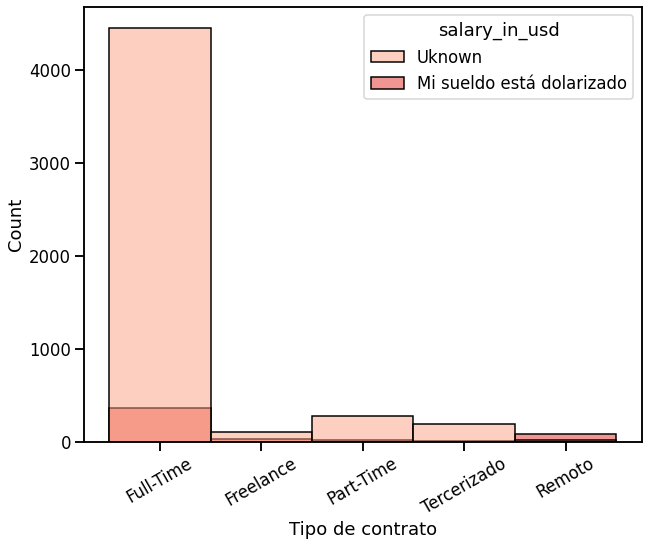

In [11]:
nuevos_nombres= {'Freelance': 'Freelance', 
                'Full-Time': 'Full-Time',
                'Part-Time': 'Part-Time',
                'Remoto (empresa de otro país)': 'Remoto', 
                'Tercerizado (trabajo a través de consultora o agencia)': 'Tercerizado'}

tipos_de_contratos= df.work_contract_type.replace(nuevos_nombres)
fig = plt.figure(figsize=(10,8))
seaborn.histplot(x=tipos_de_contratos,
                hue=df_1.salary_in_usd,
                palette='Reds')
plt.xticks(rotation=30)
plt.xlabel("Tipo de contrato")
plt.ticklabel_format(style='plain', axis='y')

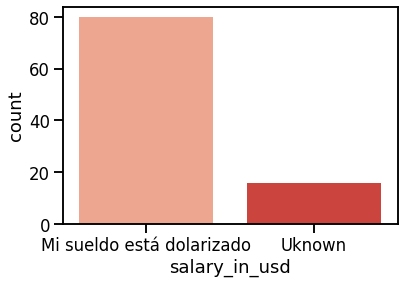

In [12]:
df_4 = df_1[df_1[variables_categoricas[0]] == 'Remoto (empresa de otro país)']

seaborn.countplot(x= df_4['salary_in_usd'], palette= 'Reds')

Como se puede observar en los gráficos anteriores, la mayoría programadores que trabajan de forma remota, para empresas de otro país, tienen el sueldo dolarizado, y por ello tienen un salario mayor, a diferencia del resto de los trabajadores, que en su mayoría no tienen el salario dolarizado.

A continuación se puede observar otra tabla resumen en las que se representa la madia de salarios neto y bruto de acuerdo al género.

In [13]:
t_1 = df_1[[variables_categoricas[1], variables_numericas[2], variables_numericas[1]]].groupby(variables_categoricas[1]).mean()
round (t_1)

,salary_monthly_NETO,salary_monthly_BRUTO
profile_gender,,
Hombre,88748.0,116588.0
Mujer,75071.0,94783.0
Otros,95500.0,123363.0


Como conclusión de lo observado en la tabla mostrada se puede decir que, como es esperado, la media del salario bruto es aproximadamente un 15-20% mayor a la media del salario neto, y además que la media en los salarios pertenecientes al género femenino parecería ser menor a la perteneciente al género masculino.

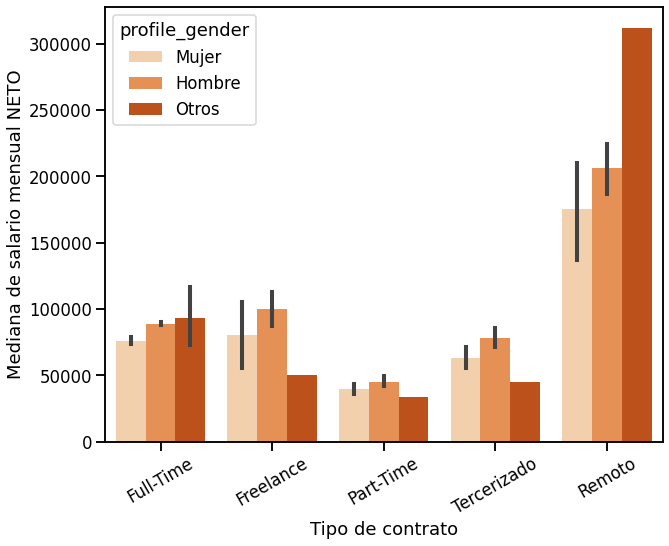

In [14]:
nuevos_nombres= {'Freelance': 'Freelance', 
                'Full-Time': 'Full-Time',
                'Part-Time': 'Part-Time',
                'Remoto (empresa de otro país)': 'Remoto', 
                'Tercerizado (trabajo a través de consultora o agencia)': 'Tercerizado'}

hue_order = ['Hombre', 'Mujer', 'Otros']
tipos_de_contratos= df.work_contract_type.replace(nuevos_nombres)
fig = plt.figure(figsize=(10,8))
seaborn.barplot(y=df_1[variables_numericas[2]], x=tipos_de_contratos,
                hue=df_1.profile_gender,
                estimator=numpy.mean,
                ci=95,
                palette='Oranges')
plt.xticks(rotation=30)
plt.ylabel("Mediana de salario mensual NETO")
plt.xlabel("Tipo de contrato")
plt.ticklabel_format(style='plain', axis='y')

En este caso se represento de forma gráfica tres variables en donde se muestra la media del salario neto correspondiente a los distintos tipos de contratos y diferenciados por género. En todos los casos se puede observar que el salario correspondiente a las mujeres parecería ser menor en todos los casos al de los hombres y particularmente en el tipo de trabajo remoto; aunque como los intervalos de confianza se superponen, se debería realizar un test de hipótesis para corroborar si efectivamente el salario de las mujeres es significativamente menor al de los hombres. 

A continuación se grafica la edad de los individuos en comparación a la media de los salarios netos.

In [15]:
df_3 = df_1[df_1[variables_numericas[0]] < 100]

Se seleccionaron aquellas edades inferiores a 100 años, ya que se considera que cualquier dato mayor a dicho valor se trata de un dato erroneo.

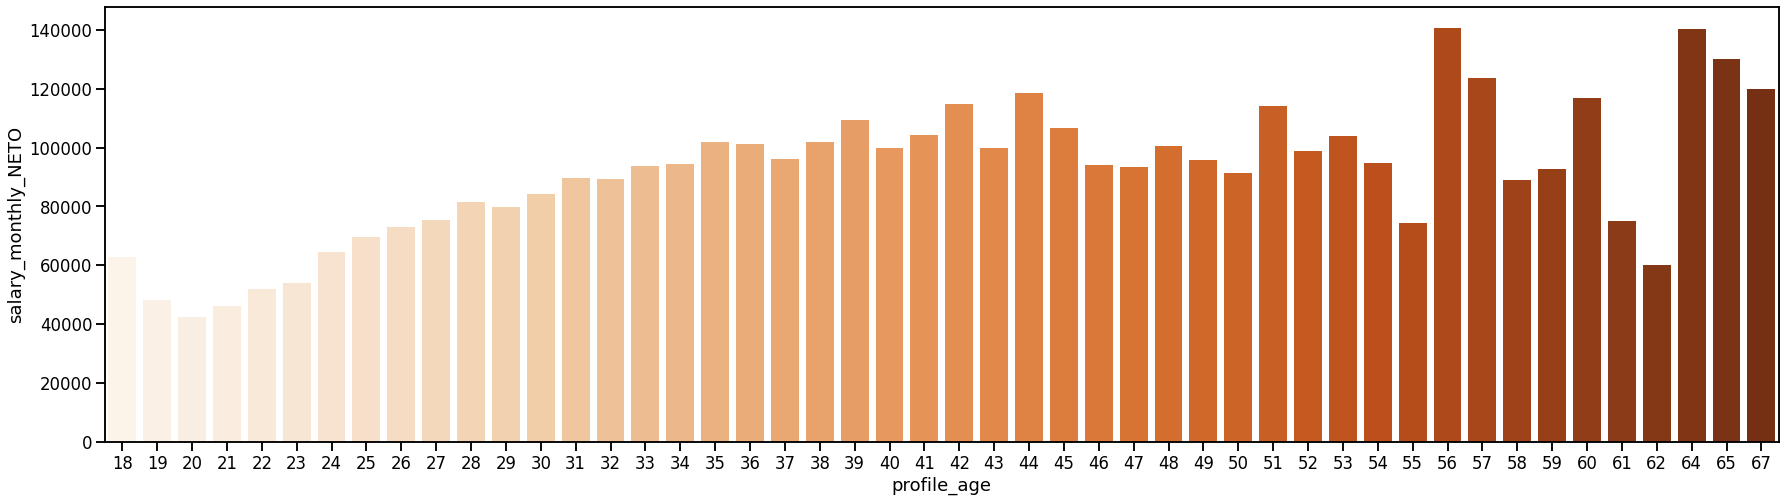

In [16]:
fig = plt.figure(figsize=(30,8))
seaborn.barplot(x=df_3[variables_numericas[0]], y=df_3[variables_numericas[2]], palette= 'Oranges', estimator=numpy.mean, ci= None)

En este último gráfico se puede observar una tendencia en aumento en relación al aumento de edades, en principal en los primeros años a partir de los 18 años, llegando a un amesetamiento a partir de los 35 años.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Para conocer si dos variables aleatorias están correlacionadas se puede utilizar la covariancia y la correlación. El resultado de ambas métricas nos van a indicar de que forman se relacionan las variables de interés.

Para analizar si el salario bruto y neto están correlacionados primero se realizar un gráfico en caracter de obtener un idea preliminar de la relación existente entre dichas variables, y luego se calculan las medidas anteriormente mencionadas.

**Gráfico de "salary_monthly_BRUTO" vs "salary_monthly_NETO"**

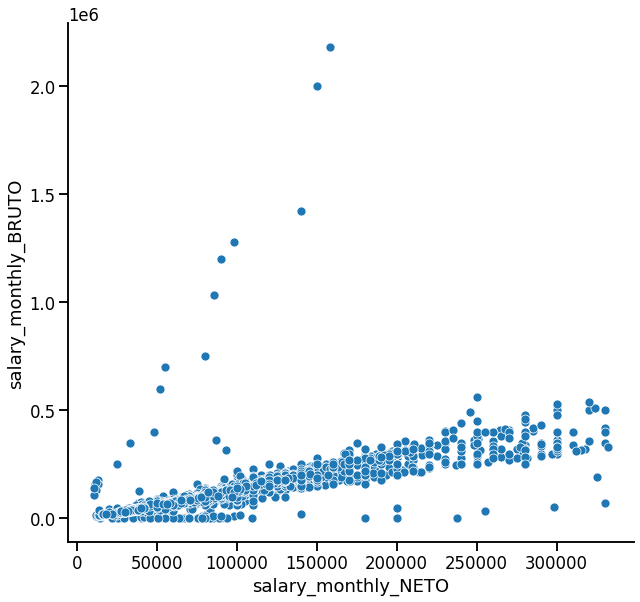

In [17]:
g = seaborn.pairplot(data=df_1, y_vars=relevant_columns[2],
                 x_vars=relevant_columns[1])
g.fig.set_size_inches(40,40)

A simple vista podemos pensar que existe una relación lineal positiva, vemos que a medida que el salario bruto aumenta, el salario neto también. También podemos notar que la visualización se ve afectada por aquellos valores de salarios netos y brutos anormales, los cuales se deben a una carga erronea. Esto debería ser analizado y depurado.

In [18]:
df_clean = df_1[df_1['salary_monthly_BRUTO'] < 1000000]

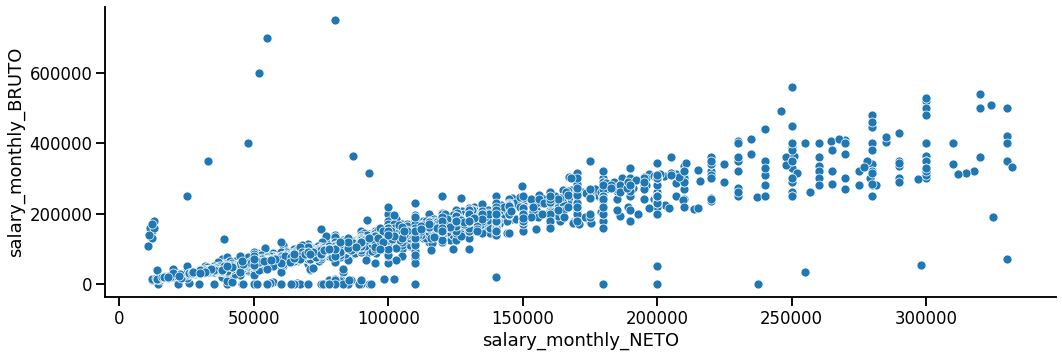

In [19]:
g = seaborn.pairplot(data=df_clean, y_vars=relevant_columns[2],
                 x_vars=relevant_columns[1],
                 aspect=3, height=5)

**Covariancia y Correlación**

In [20]:
df_cov = df_clean[[relevant_columns[2], relevant_columns[1]]].cov()
df_cov.loc[relevant_columns[2], relevant_columns[1]]

3181555130.9571576

In [21]:
df_corr = df_clean[[relevant_columns[2], relevant_columns[1]]].corr()
df_corr.loc[relevant_columns[2], relevant_columns[1]]

0.9158810796811802

En base a la métricas calculadas podemos concluir que  existen una correlacion positiva.

Este resultado nos indica que podría ser conveniente mantener el salario bruto en la encuesta, y de esta forma utilizarla para detectar posibles errores tanto en esta variable como en el salario neto.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






**Subpobalciones**

Vamos a dividir la población en 2 según su nivel de estudios, esto lo realizamos a partir de los valores que puede tomar la columna `'profile_studies_level'`. Clasificamos a los estudios primario, secundario o terciario como estudios Básicos y a los universitarios, posgrado, doctorado o posdoctorado como estudios Avanzados. Las subpoblaciones van a estar conformadas por aquellos que cuentan con hasta estudios básicos vs aquellos con hasta estudios avanzados.

In [22]:
studies_col = 'profile_studies_level'
salary_col = 'salary_monthly_NETO'
df_studies = df_1.copy()

print(df_1.profile_studies_level.unique())
df_1[studies_col].count()

['Universitario' 'Secundario' 'Posgrado' 'Terciario' 'Doctorado'
 'Primario' 'Posdoctorado']


5537

In [23]:
new_groups = {
    'Posdoctorado': 'Avanzado',
    'Doctorado': 'Avanzado',
    'Posgrado': 'Avanzado',
    'Universitario': 'Avanzado',
    'Terciario': 'Basico',
    'Secundario': 'Basico',
    'Primario': 'Basico'
}

df_studies.profile_studies_level.replace(new_groups, inplace=True)
df_studies_basico = df_studies[df_studies.profile_studies_level == 'Basico']
df_studies_avanzado = df_studies[df_studies.profile_studies_level == 'Avanzado']
df_studies.profile_studies_level.unique()

array(['Avanzado', 'Basico'], dtype=object)

**Subpoblación con estudio Básico**

In [24]:
print(df_studies_basico.profile_studies_level.unique())
df_studies_basico[studies_col].count()

['Basico']


1454

**Subpoblación con estudio Avanzado**

In [25]:
print(df_studies_avanzado.profile_studies_level.unique())
df_studies_avanzado[studies_col].count()

['Avanzado']


4083

**Distribución de salario según estudios**

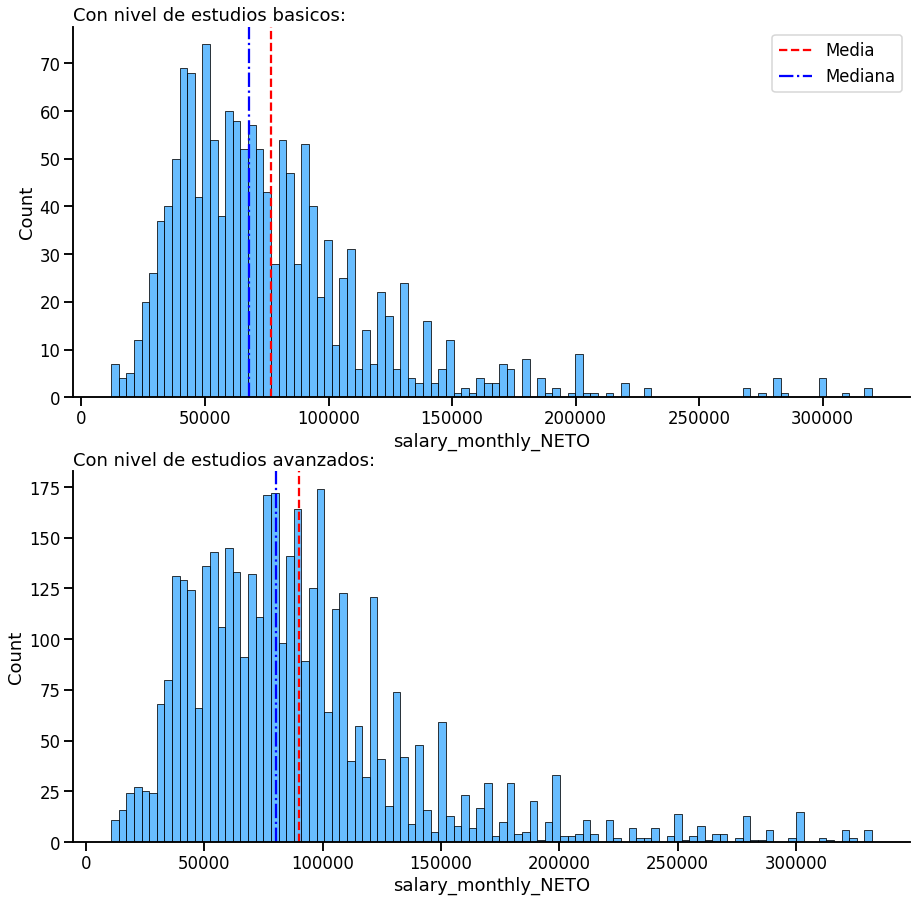

In [26]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 15))
seaborn.histplot(df_studies_basico[salary_col], bins=100, ax=axes[0], color='#35A7FF')
axes[0].axvline(df_studies_basico[salary_col].mean(), color='red',
            linestyle='--', label='Media')
axes[0].axvline(df_studies_basico[salary_col].median(), color='blue',
            linestyle='-.', label='Mediana')
axes[0].set_title('Con nivel de estudios basicos:', loc='left')

seaborn.histplot(df_studies_avanzado[salary_col], bins=100, ax=axes[1], color='#35A7FF')
axes[1].axvline(df_studies_avanzado[salary_col].mean(), color='red',
            linestyle='--', label='Media')
axes[1].axvline(df_studies_avanzado[salary_col].median(), color='blue',
            linestyle='-.', label='Mediana')
axes[1].set_title('Con nivel de estudios avanzados:', loc='left')

axes[0].legend()
seaborn.despine()

**¿Considera que ambas variables son independientes? ¿Qué analizaría al respecto?**

Lo que podemos ver a partir de analizar la distribución de los salarios en estas 2 subpoblaciones es que por un lado tienen una distribución con forma de campana bastante similar, pero donde los salarios de aquellos que tienen estudios avanzados se distribuyen por encima de los que tienen estudios básicos, aunque es una leve diferencia también se ve su correlación en la diferencia de las medias en la que profundizamos abajo, siendo esta de aproximadamente 13mil pesos. Es por todo esto que consideramos que ambas variables no son independientes.

Por último, analizamos la dispersión de los datos con sus medidas y con un gráfico catplot con una población reducida de 600 para poder observar de otra forma la distribución de los salarios y a su vez que sea visible la cantidad de datos que conforman cada subpoblación. Vemos, al igual que en los histogramas a partir del eje y:Count, que es notorio que los datos que tenemos de los salarios con estudios básicos es menor a los con estudios avanzados, siendo la diferencia total de aproximadamente 2500 datos, 65% menos, esta diferencia creemos que puede afectar en la buena representación de las poblaciónes.

**Medidas de centralización y dispersión**

In [27]:
df_studies[[studies_col, salary_col]].groupby(studies_col).describe().salary_monthly_NETO[['count', 'mean', 'std']]

,count,mean,std
profile_studies_level,,,
Avanzado,4083.0,90152.204487,50003.720673
Basico,1454.0,76916.165667,42836.585391


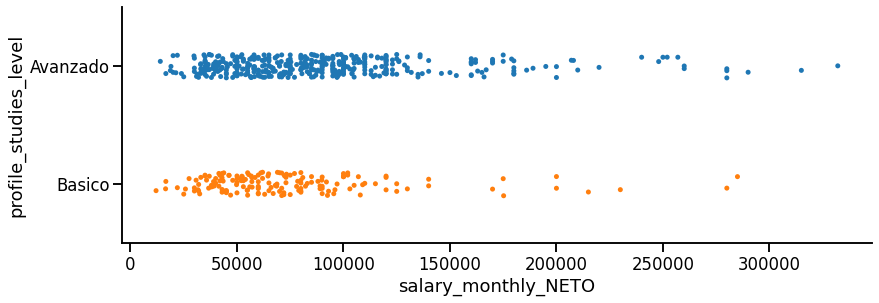

In [28]:
seaborn.catplot(data=df_studies.sample(600), x=salary_col,
                y=studies_col, height=4, aspect=3)

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


* **Variables numericas seleccionadas** : "Salario Neto" ;  "Años en la empresa actual".

* **Variable Categorica:** "Compañia recomendada".

La variable categorica **compañia recomendada** es una valoracion de 0 (menos recomendada) a 10 (mas recomendada), a los fines de simplificar la visualizacion y mejorar la interpretacion de la variable (la distancia entre intervalos es subjetiva) se utiliza el indicador **Net Promoter Score (NPS)**, que define:
* Los que responden asignando 9 o 10 puntos:  promotores
* Los que asignan 7 u 8 puntos:  pasivos o indiferentes
* Los que otorgan 6 puntos o menos: detractores

In [29]:
# Crear nueva columna para variable categorica relacionada a compañia recomendada
new_groupsCR={10:'Promotor',
             9: 'Promotor',
             8:'Neutro',
             7:'Neutro',
             6:'Detractor',
             5:'Detractor',
             4:'Detractor',
             3:'Detractor',
             2:'Detractor',
             1:'Detractor',
             0:'Detractor'}
df_1['company_recommended_cat']= df_1.company_recommended.replace(new_groupsCR)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


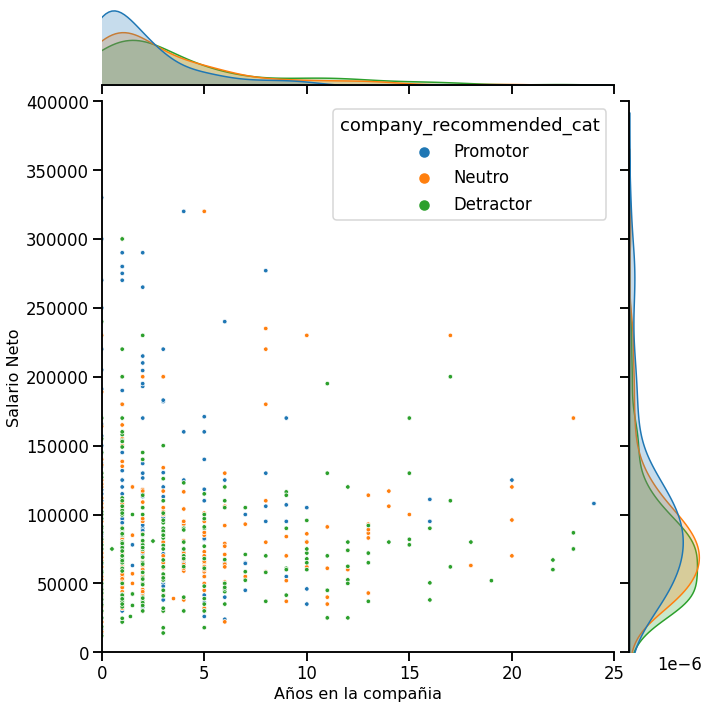

In [30]:
seleccion=['work_years_in_company','salary_monthly_NETO']

# Filtrado de Valores extremos salario Neto y Bruto
filt=((df_1['salary_monthly_NETO']<500000)  & (df_1.profile_age<99) & (df_1.work_years_in_company<25)) #& (df_1.profile_years_experience<60)

# Tomar una muestra: tomamos una muestra a los fines de no recargar el grafico y para mantener 
#     igual cantidad de muestras de nuestras subpoblaciones: Promotores, Neutros, Detractores.

company_recommended_prom =df_1[df_1.company_recommended_cat=='Promotor'].sample(250)
company_recommended_Neutro =df_1[df_1.company_recommended_cat== 'Neutro'].sample(250)
company_recommended_Detractor =df_1[df_1.company_recommended_cat=='Detractor'].sample(250)

# Scatterplot

scat =seaborn.jointplot(data=pd.concat([company_recommended_prom,company_recommended_Neutro,company_recommended_Detractor])[filt],
                    y=seleccion[1],
                    marker='.',                   
                    x = seleccion[0], 
                    hue='company_recommended_cat',
                    hue_order=['Promotor','Neutro','Detractor'],
                    kind='scatter',
                    height=10,
                    ratio=6,
                    xlim=(0,25),
                    ylim=(0,400000)
                    #size='company_diversity_cat' 
                  )
scat.set_axis_labels('Años en la compañia', 'Salario Neto', fontsize=16)


**Observaciones que surgen del Grafico:**


*   Mayor cantidad de promotores y neutros en la parte superior del grafico, podria indicar que a mayores salarios los encuestados estan mas conformes con la compañia para la cual trabajan.
*   Se observa mayor cantidad relativa de detractores en la zona de salarios mas bajos.
*   Los años de trabajo en la misma compañia no parecen tener tanta relacion con mayores salarios como podria suponerse.
*   ¿Mas cantidad de años en una compañia, mas neutrales y detractores?, en el grafico se ve como disminuye la cantidad relativa de promotores, respecto a las otras categorias, cuanto mas tiempo acumula el encuestado en la compañia.